<a href="https://colab.research.google.com/github/kingsman34/ML/blob/main/Class/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize as opt
import pandas as pd

In [15]:
data = pd.read_csv('/content/drive/MyDrive/MLAssignment/data.txt', header=None)
data = np.array(data)

X = data[:, [0, 1]]
y = data[:, [2]]

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
X = np.insert(X, 0, values=1, axis=1)
theta = np.zeros((X.shape[1], 1))

In [18]:
test_theta = np.array([[-24], [0.2], [0.2]])

In [19]:
def cost_function(theta, x, y):
    m = len(y)
    h_theta = sigmoid(x.dot(theta))
    J = (1.0 / m) * (((-y).transpose()).dot(np.log(h_theta)) - (1.0 - y.transpose()).dot(np.log(1.0 - h_theta)))
    J = np.float64(J)
    return J

In [20]:
def gradient(theta, x, y):
    m = len(y)
    n = x.shape[1]
    theta = theta.reshape((n, 1))
    h_theta = sigmoid(x.dot(theta))
    grad = (1.0 / m) * (x.transpose().dot(h_theta - y))
    return grad.flatten()

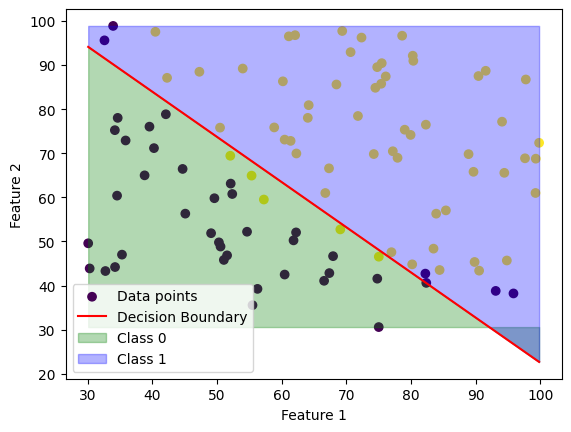

In [21]:
result = opt(fun=cost_function, x0=np.zeros(X.shape[1]), args=(X, y), method='TNC', jac=gradient)
theta = result.x

plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', label='Data points')

x1_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2_values = -(theta[0] + theta[1] * x1_values) / theta[2]

plt.plot(x1_values, x2_values, label='Decision Boundary', color='red')

plt.fill_between(x1_values, np.min(X[:, 2]), x2_values, color='green', alpha=0.3, label='Class 0')
plt.fill_between(x1_values, x2_values, np.max(X[:, 2]), color='blue', alpha=0.3, label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()